# Importing Data 

Once the data is successfuly downloaded from [https://gea.esac.esa.int/archive/](https://gea.esac.esa.int/archive/), and correctly decompressed following the instroctions provided in [Neeed to add link to README from personal github](add-link), we can now import the data on Python and store it as a data frame using the package [pandas](https://pandas.pydata.org/).

Optional, add the following to the sql code to remove impurity in data:
```sql
WHERE gs.parallax < 5 * gs.parallax_error  -- Remove potential stars
AND gs.ruwe < 1.4  -- Ensure good astrometric quality
AND gs.phot_g_mean_mag < 21  -- Bright enough for good measurements
```

In [2]:
from astroquery.gaia import Gaia
import pandas as pd

# Query to get the astrometric properties of QSO-like objects
query = """
SELECT 
    agn.source_id, 
    gs.ra, gs.dec, 
    gs.pmra, gs.pmdec, 
    gs.parallax, gs.parallax_error, 
    gs.ruwe, gs.phot_g_mean_mag,
    gs.nu_eff_used_in_astrometry,
    gs.pmra_error,
    gs.pmdec_error
FROM gaiadr3.agn_cross_id AS agn
JOIN gaiadr3.gaia_source AS gs 
ON agn.source_id = gs.source_id

"""

# Launch query and download data
job = Gaia.launch_job_async(query)
result = job.get_results()

# Save as CSV
result.write("qso_full_data.csv", format="csv", overwrite=True) # overwrite = True will allow to replace existing data when redownloaded.


ModuleNotFoundError: No module named 'astroquery'

In [6]:
import pandas as pd
# Load into Pandas
df = pd.read_csv("qso_full_data.csv")
print(df.head())  # Check the data

        source_id         ra       dec      pmra     pmdec  parallax  \
0   3470333738112  45.075505  0.152316 -1.072371 -3.191011  0.366321   
1   5944234902272  44.884761  0.164806 -0.121274  0.725026 -0.395659   
2   6459630980096  44.910498  0.189649  0.217806 -0.316007 -0.626561   
3   9517648372480  45.254655  0.228999 -0.552941 -1.895446 -0.917219   
4  10892037246720  45.188575  0.282424 -0.098037 -0.120580  0.001630   

   parallax_error      ruwe  phot_g_mean_mag  nu_eff_used_in_astrometry  \
0        0.901633  0.889714        20.571114                   1.526179   
1        1.340139  1.087911        20.704517                   1.647388   
2        0.548536  1.020956        20.173105                        NaN   
3        1.507964  1.031971        20.634562                        NaN   
4        0.246332  0.974657        18.787239                   1.565118   

   pmra_error  pmdec_error  
0    1.552507     1.226259  
1    1.482424     1.402002  
2    0.679419     0.608799  


### Column Content

Before we procede, we need to understand what each column contains, to do so let us print the heading of each column.

In [4]:
# Check column names
print(df.columns)

Index(['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error',
       'ruwe', 'phot_g_mean_mag', 'nu_eff_used_in_astrometry', 'pmra_error',
       'pmdec_error'],
      dtype='object')


The output above, displays:

1. <b>source_id</b>, Unique Gaia identifier for the object
2. <b>ra</b>, Right Ascension (celestial longitude) in degrees
3. <b>dec</b>, Declination (celestial latitude) in degrees
4. <b>pmra</b>, Proper motion in Right Ascension (mas/yr)
5. <b>pmdec</b>, Proper motion in Declination (mas/yr)
6. <b>parallax</b>, Parallax measurament (this is expected to be near zero for distant QSOs)
7. <b>ruwe</b>, Renormalised Unit Weight Error (this indicates the quality of the data point)
8. <b>phot_g_mean_mag</b>, Mean magnitude in Gaia's G-band 
9. <b>nu_eff_used_in_astrometry</b>, Efficient wavenumber denoted as $\nu_{eff}$, this is used to charecterise the color of a celestial object by describing how its light is distributed across different wavelenghts.
10. <b>parallax_error</b>, measure the uncentainty on parralax (standard deviation).
11. <b>pmra_error</b>, Uncertainty in pmra.
12. <b>pmdec_error</b>, Uncertainty in pmdec_error.

We want to make suere the data matches the description provided in the papaer, i.e. we expect there to be 1614173 sources which are identified as QSO-like objects. 

In [43]:
# Display the shape of the dataset
df.shape

(1614173, 12)

As expected, the above output confirms that there are 1614173 QSO-like objects in the dataset.

# Visualising Data

In this section we are going to reproduce some of the plots presented in the paper [Gaia Early Data Realease 3, Acceleration of the Solar System from Gaia astrometry](https://www.aanda.org/articles/aa/full_html/2021/05/aa39734-20/aa39734-20.html). 

<b>Efficient wavenumber $\nu_{eff}$</b> distribution visualisation:

In [44]:
df

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,ruwe,phot_g_mean_mag,nu_eff_used_in_astrometry,pmra_error,pmdec_error
0,3470333738112,45.075505,0.152316,-1.072371,-3.191011,0.366321,0.901633,0.889714,20.571114,1.526179,1.552507,1.226259
1,5944234902272,44.884761,0.164806,-0.121274,0.725026,-0.395659,1.340139,1.087911,20.704517,1.647388,1.482424,1.402002
2,6459630980096,44.910498,0.189649,0.217806,-0.316007,-0.626561,0.548536,1.020956,20.173105,NaN,0.679419,0.608799
3,9517648372480,45.254655,0.228999,-0.552941,-1.895446,-0.917219,1.507964,1.031971,20.634562,NaN,1.988008,1.378176
4,10892037246720,45.188575,0.282424,-0.098037,-0.120580,0.001630,0.246332,0.974657,18.787239,1.565118,0.257395,0.223107
...,...,...,...,...,...,...,...,...,...,...,...,...
1614168,6917502467565029248,314.977133,-0.321496,-0.047599,0.103747,-0.127926,0.215991,1.062087,18.545496,NaN,0.226686,0.139130
1614169,6917504597868798592,315.163726,-0.331603,-0.301592,0.201947,-0.421531,0.346653,1.013019,19.289822,NaN,0.407946,0.251676
1614170,6917504769667500416,315.164733,-0.320391,-0.689676,-0.304574,0.267887,0.589744,0.983724,19.866022,NaN,0.648754,0.440534
1614171,6917523049047067648,315.119522,-0.165171,0.982301,-0.305680,-0.000245,0.719941,0.983996,19.976761,NaN,0.940451,0.403836


Five-parameter solutions

In [45]:
import matplotlib.pyplot as plt

# Collecting columns individually from dataset df
data_nu_eff = df['nu_eff_used_in_astrometry'].dropna()
data_G = df['phot_g_mean_mag'].dropna()
data_RUWE = df['ruwe'].dropna()


In [46]:
print(data_nu_eff)

0          1.526179
1          1.647388
4          1.565118
5          1.613716
6          1.584296
             ...   
1614100    1.619118
1614101    1.622210
1614109    1.653227
1614114    1.502613
1614149    1.617653
Name: nu_eff_used_in_astrometry, Length: 1215942, dtype: float64


Text(0, 0.5, 'Count')

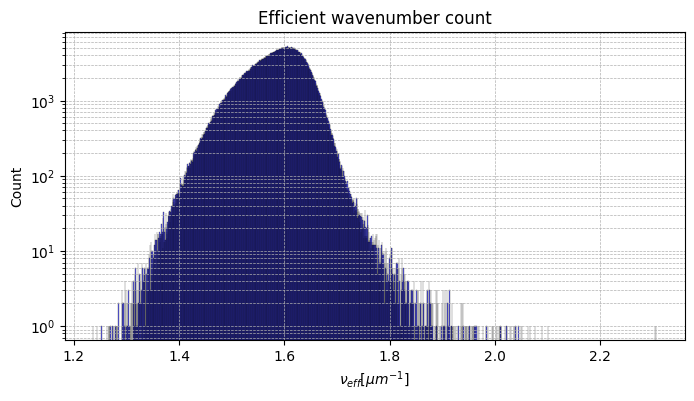

In [88]:
plt.figure(figsize=(8, 4))
plt.hist(data_nu_eff, bins=2000, density=False, alpha=0.6, histtype='bar', color = 'b',edgecolor='black', linewidth=0.3)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.title('Efficient wavenumber count')
plt.xlabel(r'$\nu_{eff}[\mu m^{-1}]$')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

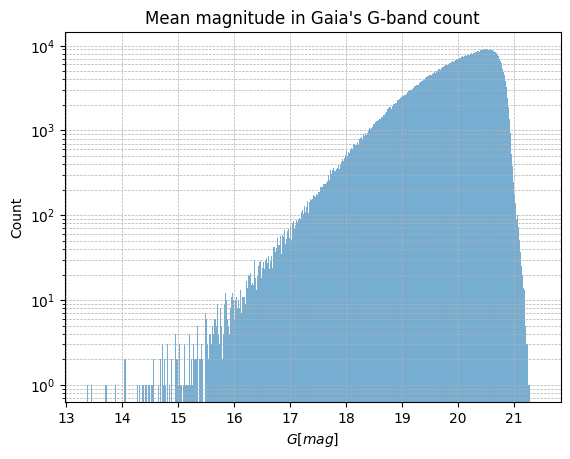

In [78]:
plt.hist(data_G, bins=1000, density=False, alpha=0.6, histtype='bar', log=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.title('''Mean magnitude in Gaia's G-band count''')
plt.xlabel(r'$G[mag]$')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

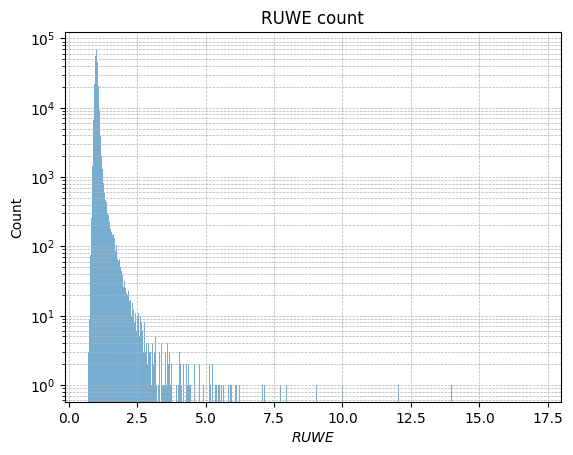

In [84]:
plt.hist(data_RUWE, bins=3000, density=False, alpha=0.6, histtype='bar', log = True)
#plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.title('''RUWE count''')
plt.xlabel(r'$RUWE$')
plt.ylabel('Count')

Six-parameter solution

In [56]:
# Parrallax, mean and uncertainty
data_parallaxes = df['parallax']
parallax_mean = df['parallax'].mean()
parallax_std = df['parallax'].std()
data_par_error = df['parallax_error']

# Proper motion Right Ascension, mean and uncertainty
data_pmra = df['pmra']
pmra_mean = df['pmra'].mean()
pmra_std = df['pmra'].std()
data_pmra_er = df['pmra_error']

# Proper motion Declination, mean and uncertainty
data_pmdec = df['pmdec']
pmdec_mean = df['pmdec'].mean()
pmdec_std = df['pmdec'].std()
data_pmdec_error = df['pmdec_error']

Parallax, pmra \& pmdec normalised histogram plots

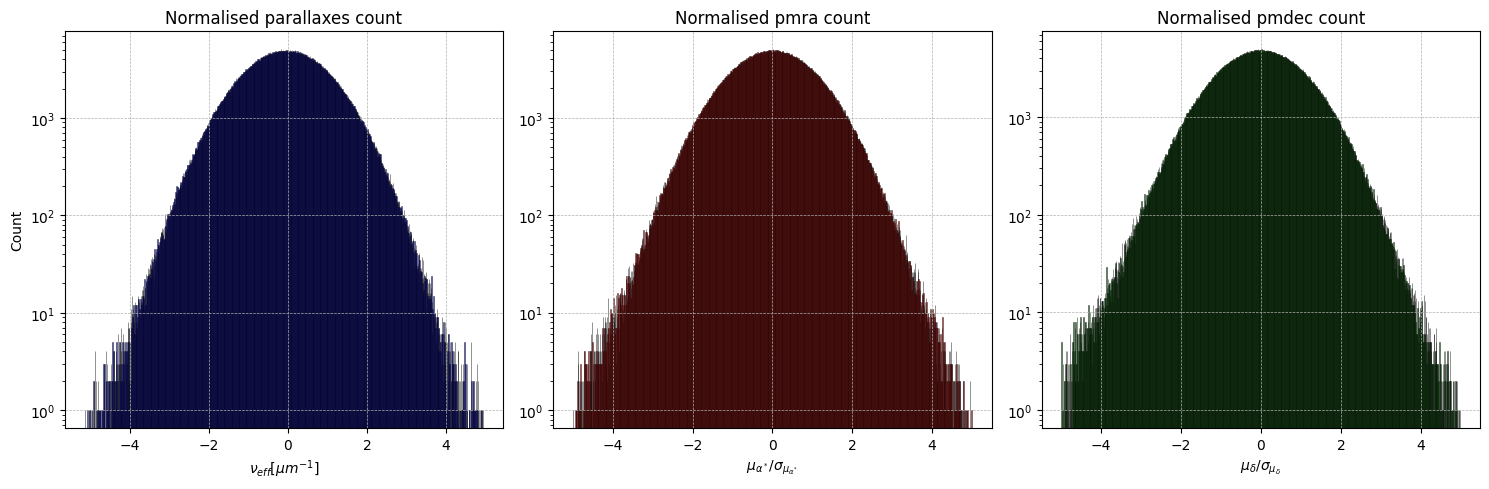

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data1 = (data_parallaxes)/data_par_error  
data2 = (data_pmra)/data_pmra_er
data3 = (data_pmdec)/data_pmdec_error

no_bins = 1250


fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Parallax
axes[0].hist(data1, bins=no_bins, alpha=0.6, color='b', edgecolor='black', linewidth=0.5, log=True)
axes[0].set_title('Normalised parallaxes count')
axes[0].set_xlabel(r'$\nu_{eff} [\mu m^{-1}]$')
axes[0].set_ylabel('Count')
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Pmra
axes[1].hist(data2, bins=no_bins, alpha=0.6, color='r', edgecolor='black', linewidth=0.5, log=True)
axes[1].set_title('Normalised pmra count')
axes[1].set_xlabel(r'$\mu_{\alpha^*}/\sigma_{\mu_{\alpha^*}}$')
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Pmdec
axes[2].hist(data3, bins=no_bins, alpha=0.6, color='g', edgecolor='black', linewidth=0.5, log=True)
axes[2].set_title('Normalised pmdec count')
axes[2].set_xlabel(r'$\mu_{\delta}/\sigma_{\mu_{\delta}}$')
axes[2].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


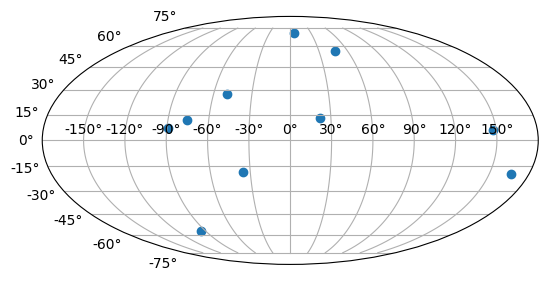

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.subplot(111, projection="mollweide")
plt.grid(True)

objects = np.random.choice(np.arange(len(df)), 10, replace=False)

ra = df.ra.to_numpy()[objects] / 180 * np.pi - np.pi
dec = df.dec.to_numpy()[objects] / 180 * np.pi

plt.scatter(ra, dec)

plt.show()

In [22]:
np.max(ra)

5.02233577111334

In [12]:
df.ra.to_numpy()

array([ 45.07550473,  44.8847607 ,  44.91049781, ..., 315.16473331,
       315.11952154, 314.92349873])